In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataFrame = pd.read_csv('voice.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataFrame[['meanfreq', 'sd', 'centroid', 'meanfun', 'IQR', 'median']],
    dataFrame['label'], random_state=0)

print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))


X_train shape: (2376, 6)
y_train shape: (2376,)
X_test shape: (792, 6)
y_test shape: (792,)


In [5]:
dataFrame

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Checking the accuracy of model for k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test score for k=1: " + str(round((knn.score(X_test, y_test) * 100), 4)) + '%')

# Using elbow method to find a good value of 'k' and thus improve the accuracy of the model
error_rate = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_k != y_test))

Test score for k=1: 97.3485%


Text(0, 0.5, 'Error Rate')

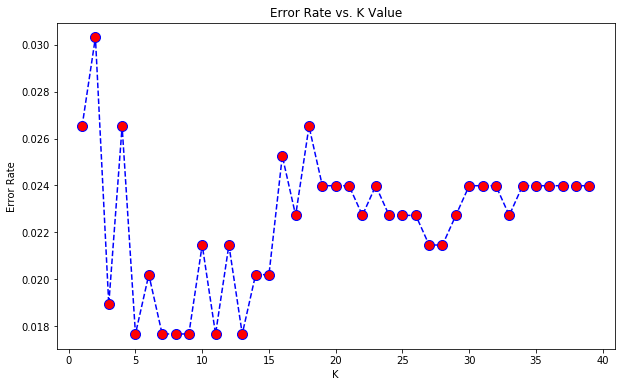

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Test score for k=5: " + str(round((knn.score(X_test, y_test) * 100), 4)) + '%')


Test score for k=5: 98.2323%


In [7]:
#Installing required libraries
!pip install hickle

  Created wheel for dill: filename=dill-0.3.2-py3-none-any.whl size=78977 sha256=f494821b59fb119fe197d6567bc88b297cfd159fb674ac91343195e7bafac48b
  Stored in directory: c:\users\ravi solanki\appdata\local\pip\cache\wheels\72\6b\d5\5548aa1b73b8c3d176ea13f9f92066b02e82141549d90e2100
Successfully built dill


In [8]:

import sys